# Student Intervention System
The main goal of this project is to wheter a student will pass of fail the exam.

## Stages of the Project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

In [2]:
dataset = pd.read_csv("student-data.csv")
dataset["passed"] = dataset["passed"].map({"yes": 1, "no": 0})

print(dataset.shape)

(395, 31)


In [3]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,1


In [4]:
# First, let's first revert some of the categorical data back to a categorical format, as to help with interpretation
cdataset = dataset.copy()

categorical_dicts = {
    "edu": {
        0: "none",
        1: "primary education",
        2: "5th to 9th grade",
        3: "secondary education",
        4: "higher education"
    },
    "travel": {
        1: "<15 min",
        2: "15 to 30 min",
        3: "30 min to 1 hour",
        4: ">1 hour"
    },
    "study": {
        1: "<2 hours",
        2: "2 to 5 hours",
        3: "5 to 10 hours",
        4: ">10 hours"
    },
    "famrel": {
        1: "very bad",
        2: "bad",
        3: "ok",
        4: "good",
        5: "excellent"
    },
    "health": {
        1: "very bad",
        2: "bad",
        3: "ok",
        4: "good",
        5: "very good"
    },
    "rest": {
        1: "very low",
        2: "low",
        3: "ok",
        4: "high",
        5: "very high"
    }
}

cdataset["Medu"] = cdataset["Medu"].map(categorical_dicts["edu"])
cdataset["Fedu"] = cdataset["Fedu"].map(categorical_dicts["edu"])
cdataset["traveltime"] = cdataset["traveltime"].map(categorical_dicts["travel"])
cdataset["studytime"] = cdataset["studytime"].map(categorical_dicts["study"])
cdataset["famrel"] = cdataset["famrel"].map(categorical_dicts["famrel"])
cdataset["freetime"] = cdataset["freetime"].map(categorical_dicts["rest"])
cdataset["goout"] = cdataset["goout"].map(categorical_dicts["rest"])
cdataset["Dalc"] = cdataset["Dalc"].map(categorical_dicts["rest"])
cdataset["Walc"] = cdataset["Walc"].map(categorical_dicts["rest"])
cdataset["health"] = cdataset["health"].map(categorical_dicts["health"])
cdataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,higher education,higher education,at_home,teacher,course,mother,15 to 30 min,2 to 5 hours,0,yes,no,no,no,yes,yes,no,no,good,ok,high,very low,very low,ok,6,0
1,GP,F,17,U,GT3,T,primary education,primary education,at_home,other,course,father,<15 min,2 to 5 hours,0,no,yes,no,no,no,yes,yes,no,excellent,ok,ok,very low,very low,ok,4,0
2,GP,F,15,U,LE3,T,primary education,primary education,at_home,other,other,mother,<15 min,2 to 5 hours,3,yes,no,yes,no,yes,yes,yes,no,good,ok,low,low,ok,ok,10,1
3,GP,F,15,U,GT3,T,higher education,5th to 9th grade,health,services,home,mother,<15 min,5 to 10 hours,0,no,yes,yes,yes,yes,yes,yes,yes,ok,low,low,very low,very low,very good,2,1
4,GP,F,16,U,GT3,T,secondary education,secondary education,other,other,home,father,<15 min,2 to 5 hours,0,no,yes,yes,no,yes,yes,no,no,good,ok,low,very low,low,very good,4,1


In [5]:
cdataset.describe()

,age,failures,absences,passed
count,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,5.708861,0.670886
std,1.276043,0.743651,8.003096,0.470487
min,15.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,4.000000,1.000000
75%,18.000000,0.000000,8.000000,1.000000
max,22.000000,3.000000,75.000000,1.000000


### In Data Analysis We will Analyze To Find out the below stuff
1. ~~Missing Values~~ (There are no missing values in this DataSet)
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature

### Numerical Features

In [6]:
numerical_features = [feature for feature in cdataset.columns if cdataset[feature].dtype != 'O']
cdataset[numerical_features].head()

,age,failures,absences,passed
0,18,0,6,0
1,17,0,4,0
2,15,3,10,1
3,15,0,2,1
4,16,0,4,1


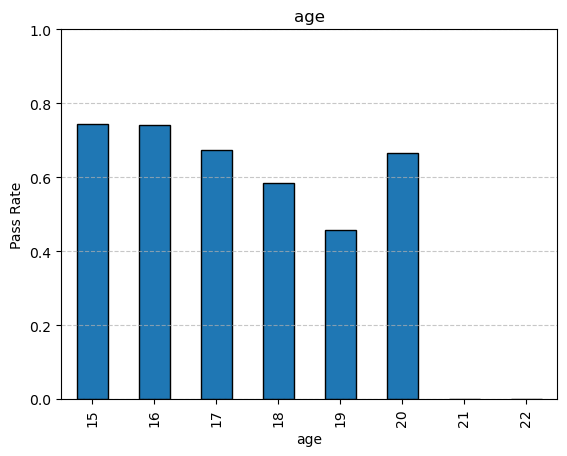

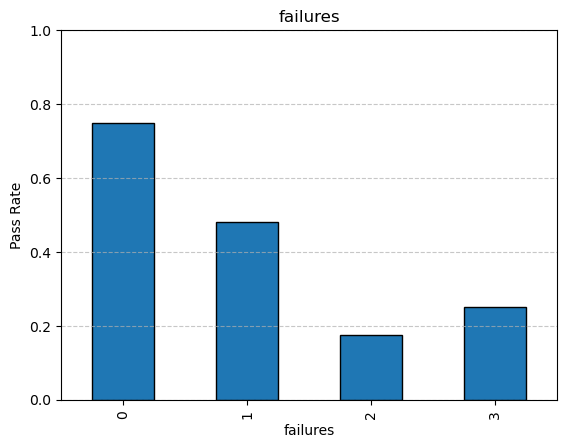

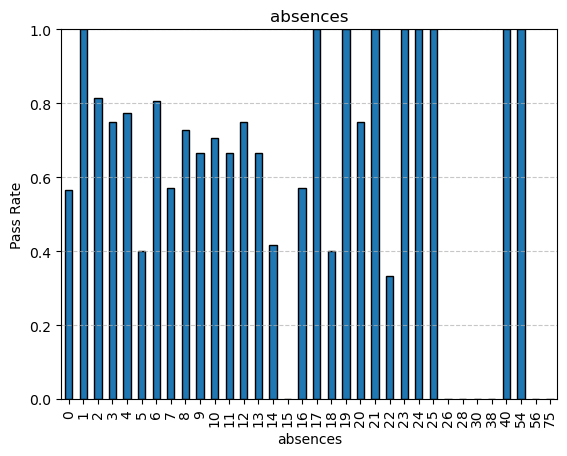

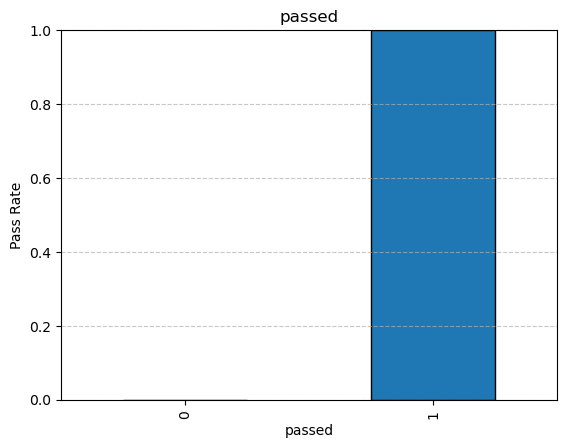

In [7]:
for feature in numerical_features:
    data = cdataset.copy()
    data.groupby(feature)["passed"].mean().plot(kind="bar", edgecolor="black")
    plt.xlabel(feature)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.ylabel("Pass Rate")
    plt.ylim(0, 1)
    plt.title(feature)
    plt.show()

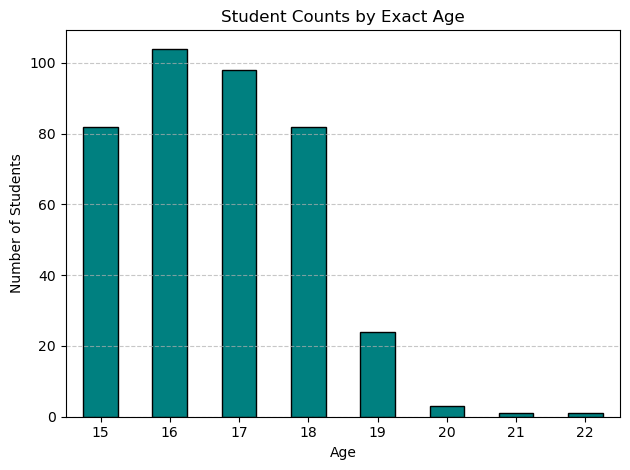

In [8]:
cdataset["age"].value_counts().sort_index().plot(kind="bar", color="teal", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.title("Student Counts by Exact Age")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Observation: Most students are between 15 and 18

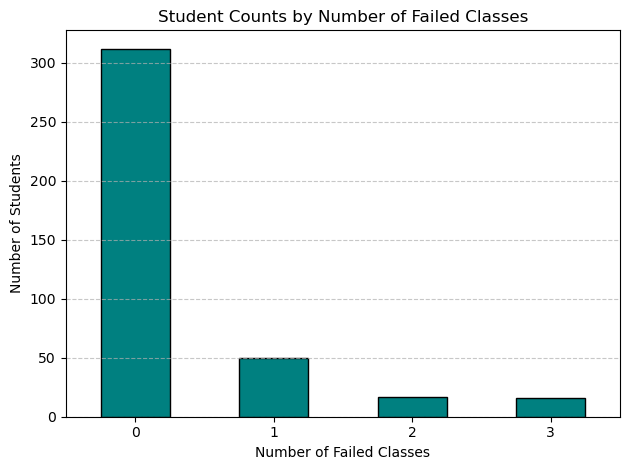

In [20]:
ax = cdataset["failures"].value_counts().sort_index().plot(kind="bar", color="teal", edgecolor="black")
plt.xlabel("Number of Failed Classes")
plt.ylabel("Number of Students")
plt.title("Student Counts by Number of Failed Classes")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Observation: About 80% of students haven't failed any classes.

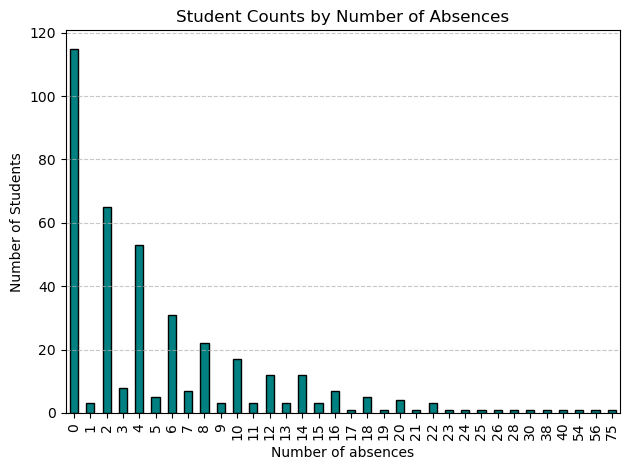

In [9]:
cdataset["absences"].value_counts().sort_index().plot(kind="bar", color="teal", edgecolor="black")
plt.xlabel("Number of absences")
plt.ylabel("Number of Students")
plt.title("Student Counts by Number of Absences")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Observation: There seems to be an exponential decay of students as the number of absences increases.

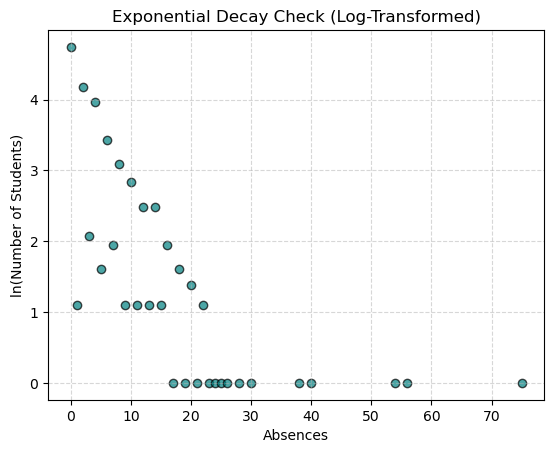

In [10]:
absence_counts = cdataset["absences"].value_counts().sort_index()

# Avoid ln(0)
ln_students = np.log(absence_counts.replace(0, 1e-10))

plt.scatter(
    x=absence_counts.index,
    y=ln_students,
    color="teal",
    edgecolor="black",
    alpha=0.7
)

plt.xlabel('Absences')
plt.ylabel('ln(Number of Students)')
plt.title('Exponential Decay Check (Log-Transformed)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Observation: The exponential decay seems to be true for the most part.

In [14]:
from ydata_profiling import ProfileReport

# Create a ProfileReport object
profile = ProfileReport(
    cdataset,
    title="Data Visualization Report",
    explorative=True,
    correlations={
                                        "pearson" : {"calculate": True},
                                        "spearman": {"calculate": True},
                                        "kendall" : {"calculate": False},
                                        "phi_k"   : {"calculate": False},
                                    }
)

# Save the report as an HTML file
profile.to_file("data_visualization_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 31/31 [00:00<00:00, 50.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Categorical Features

In [21]:
categorical_features = [feature for feature in cdataset.columns if cdataset[feature].dtype == 'O']
cdataset[categorical_features].head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,GP,F,U,GT3,A,higher education,higher education,at_home,teacher,course,mother,15 to 30 min,2 to 5 hours,yes,no,no,no,yes,yes,no,no,good,ok,high,very low,very low,ok
1,GP,F,U,GT3,T,primary education,primary education,at_home,other,course,father,<15 min,2 to 5 hours,no,yes,no,no,no,yes,yes,no,excellent,ok,ok,very low,very low,ok
2,GP,F,U,LE3,T,primary education,primary education,at_home,other,other,mother,<15 min,2 to 5 hours,yes,no,yes,no,yes,yes,yes,no,good,ok,low,low,ok,ok
3,GP,F,U,GT3,T,higher education,5th to 9th grade,health,services,home,mother,<15 min,5 to 10 hours,no,yes,yes,yes,yes,yes,yes,yes,ok,low,low,very low,very low,very good
4,GP,F,U,GT3,T,secondary education,secondary education,other,other,home,father,<15 min,2 to 5 hours,no,yes,yes,no,yes,yes,no,no,good,ok,low,very low,low,very good


In [22]:
for feature in categorical_features:
    print(f"The feature '{feature}' has #{len(cdataset[feature].unique())} different categories")

The feature 'school' has #2 different categories
The feature 'sex' has #2 different categories
The feature 'address' has #2 different categories
The feature 'famsize' has #2 different categories
The feature 'Pstatus' has #2 different categories
The feature 'Medu' has #5 different categories
The feature 'Fedu' has #5 different categories
The feature 'Mjob' has #5 different categories
The feature 'Fjob' has #5 different categories
The feature 'reason' has #4 different categories
The feature 'guardian' has #3 different categories
The feature 'traveltime' has #4 different categories
The feature 'studytime' has #4 different categories
The feature 'schoolsup' has #2 different categories
The feature 'famsup' has #2 different categories
The feature 'paid' has #2 different categories
The feature 'activities' has #2 different categories
The feature 'nursery' has #2 different categories
The feature 'higher' has #2 different categories
The feature 'internet' has #2 different categories
The feature

Observation: Every categorical feature has low cardinality. Therefore, we will use One-hot encoding.

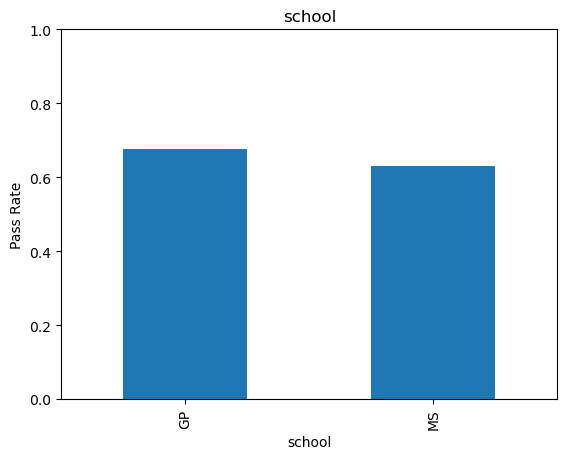

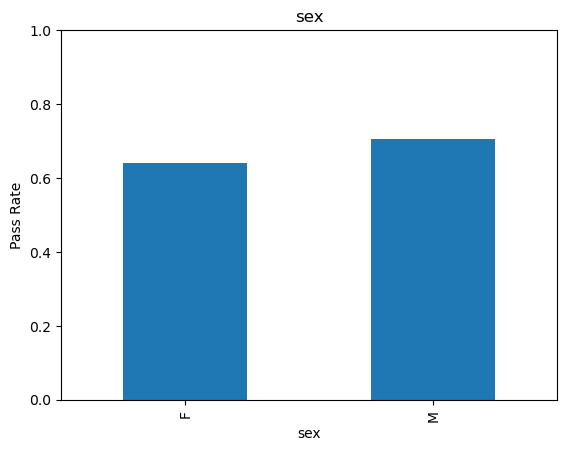

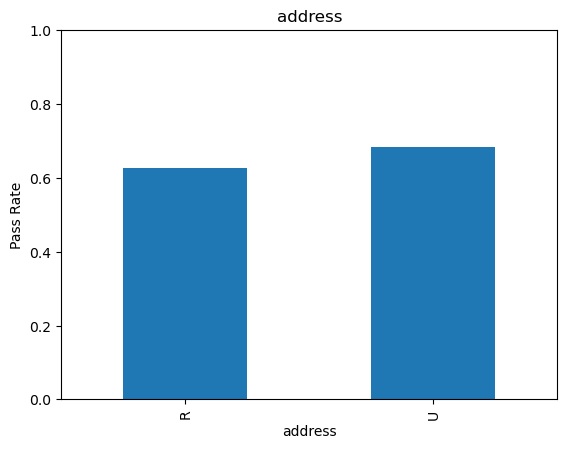

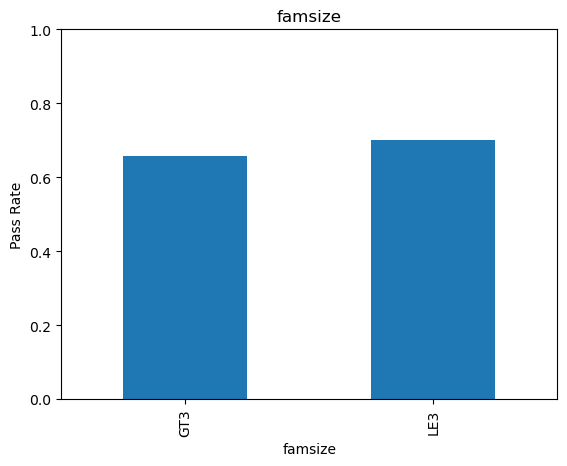

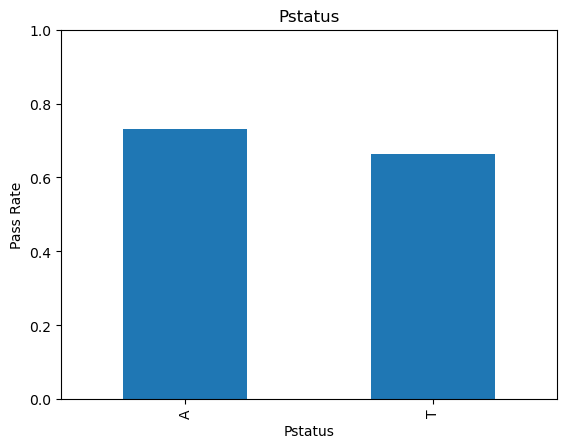

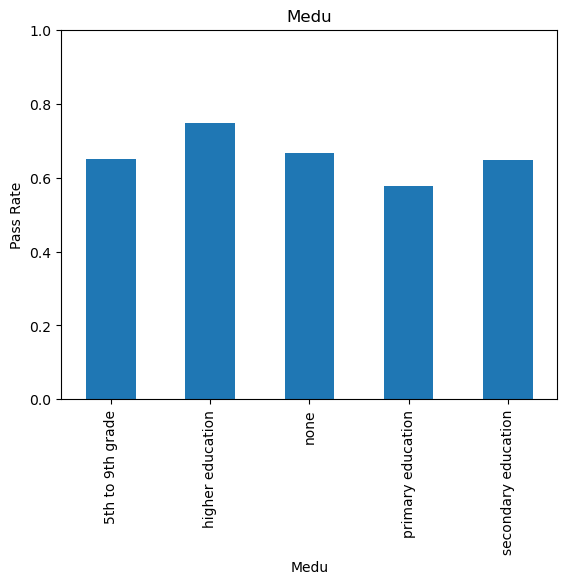

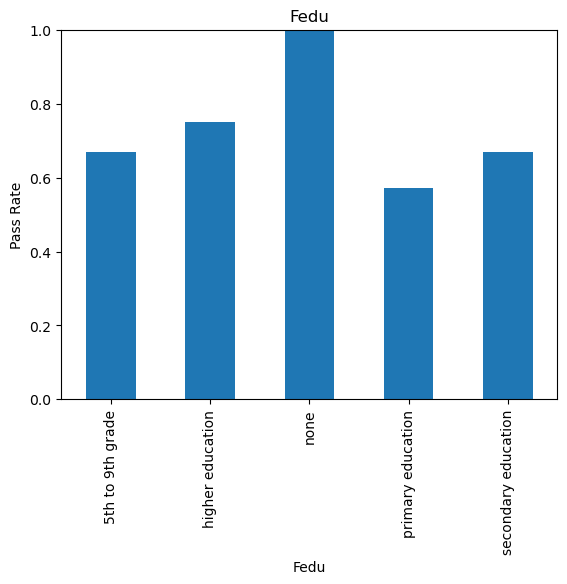

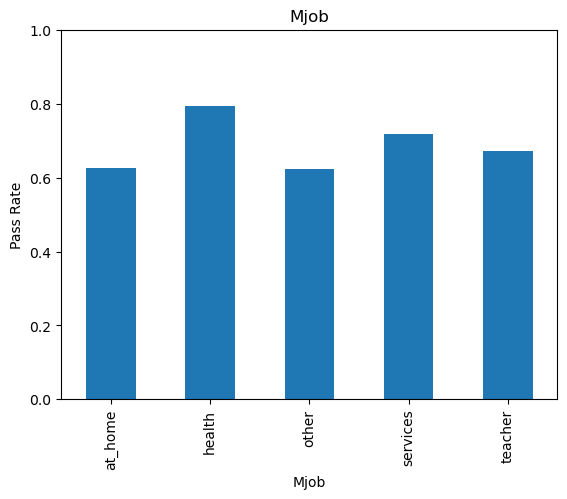

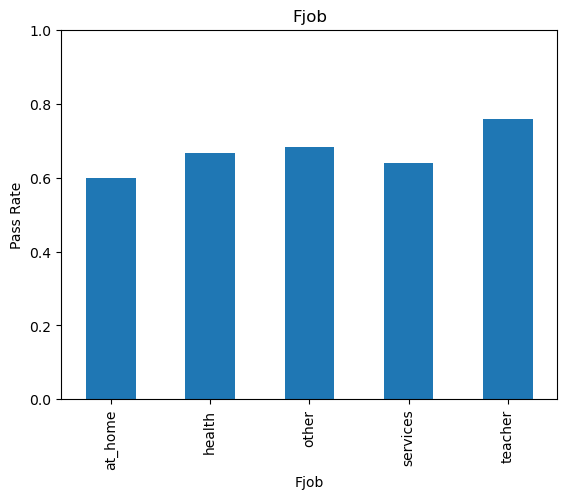

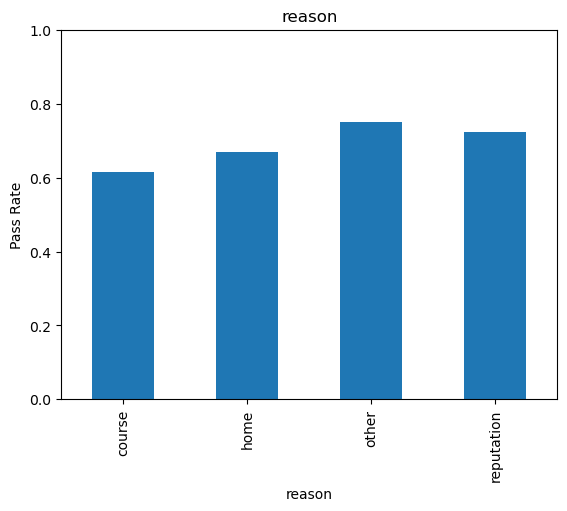

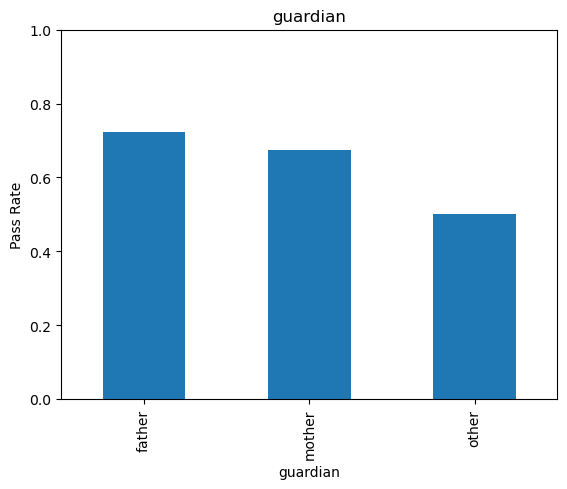

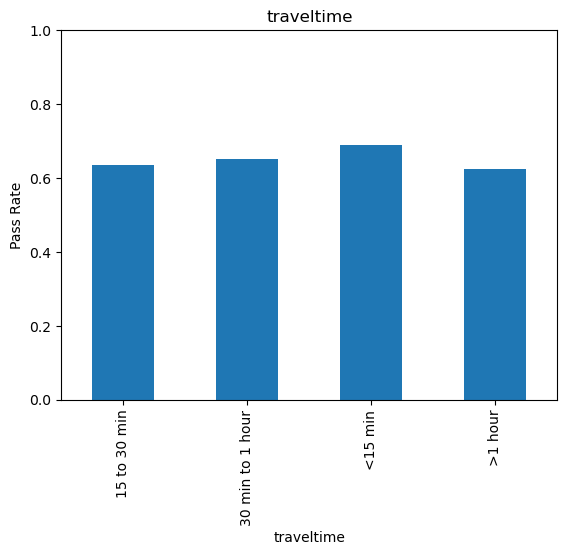

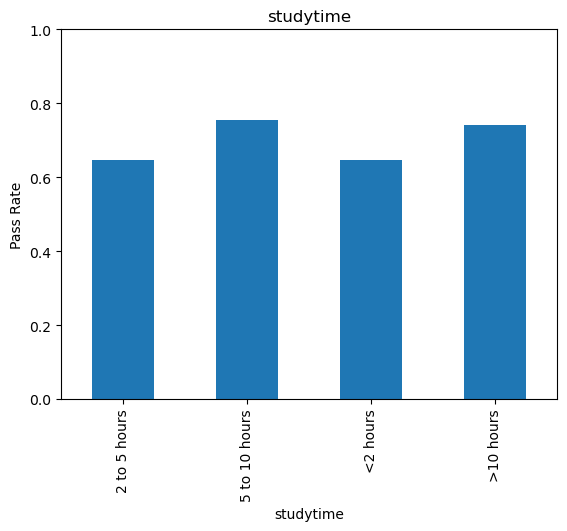

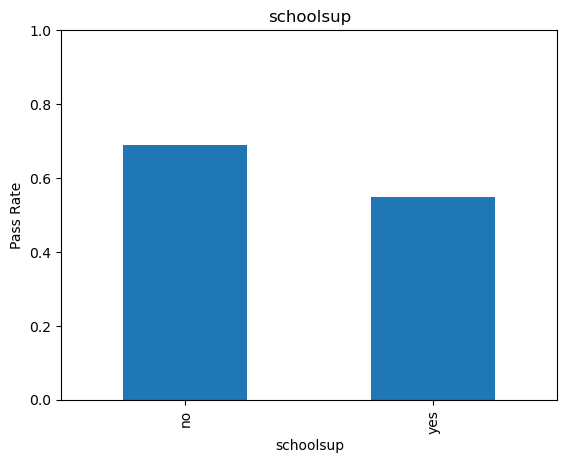

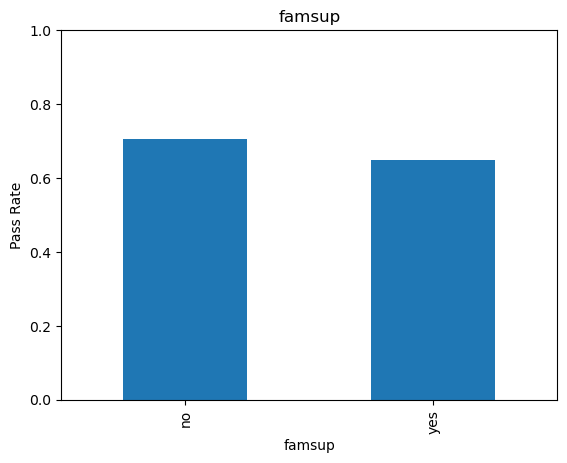

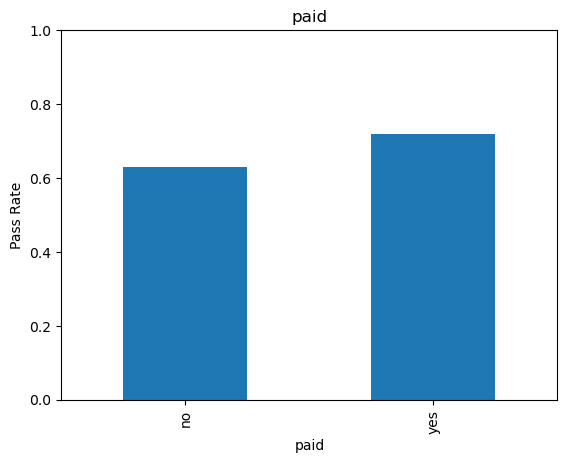

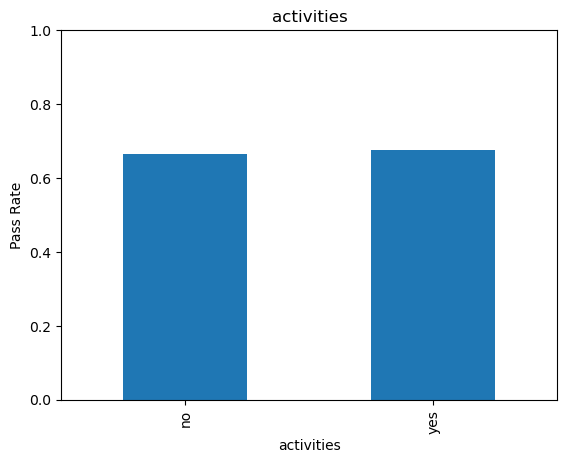

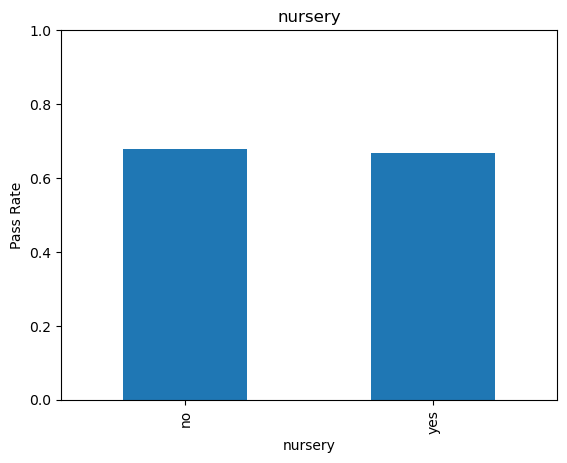

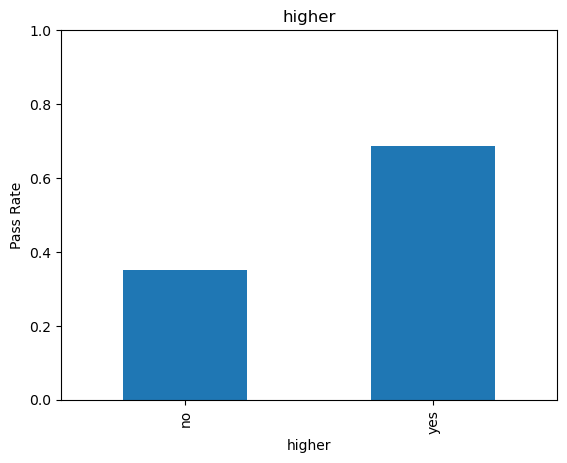

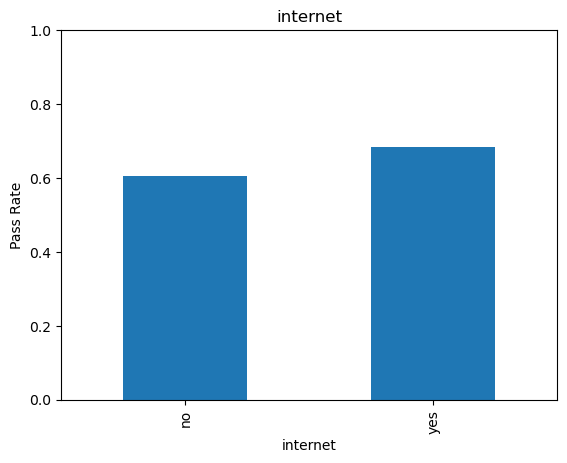

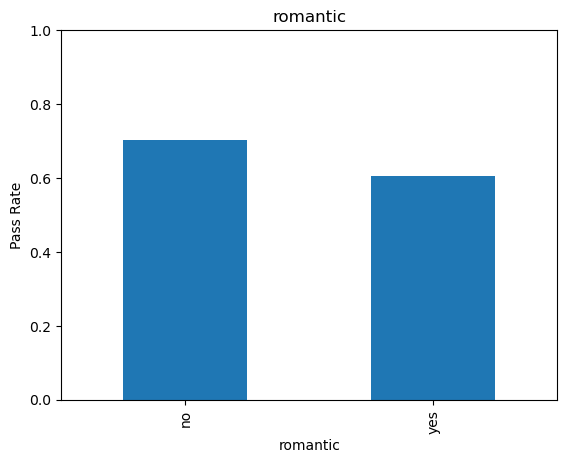

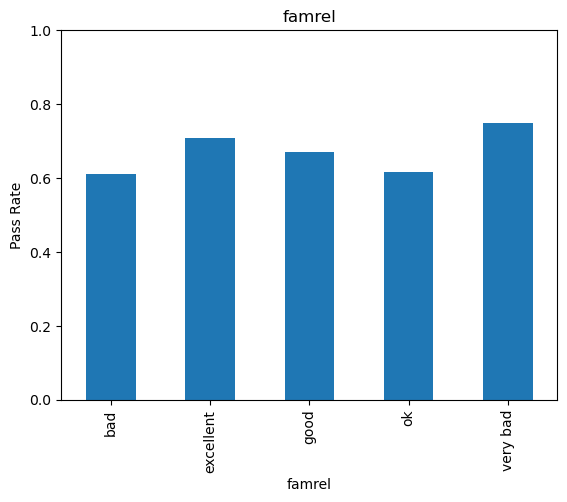

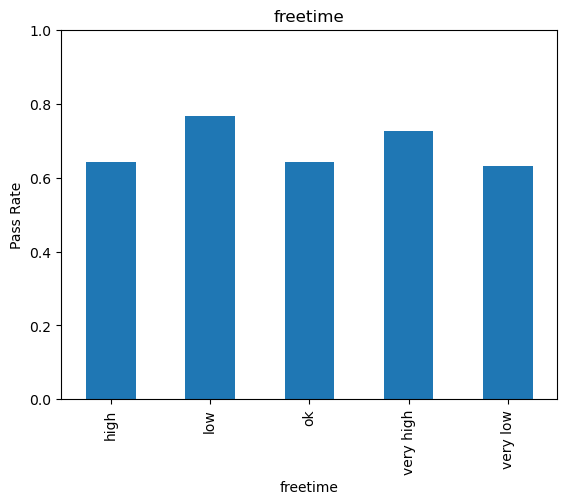

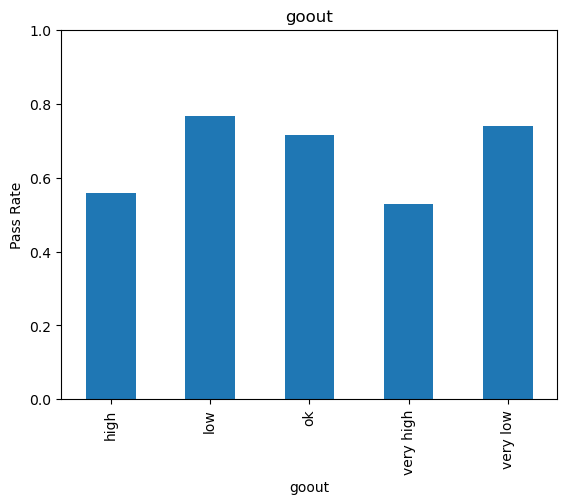

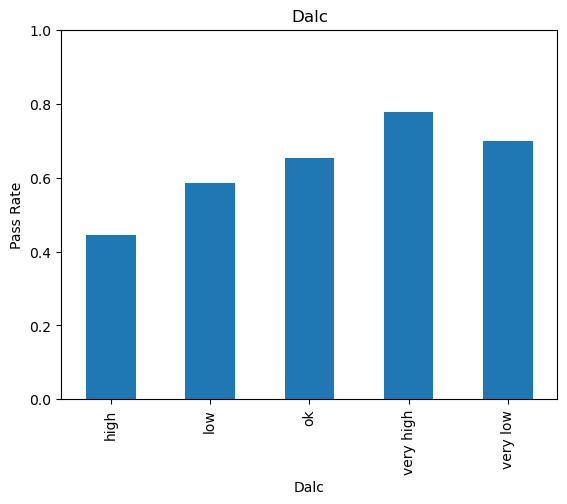

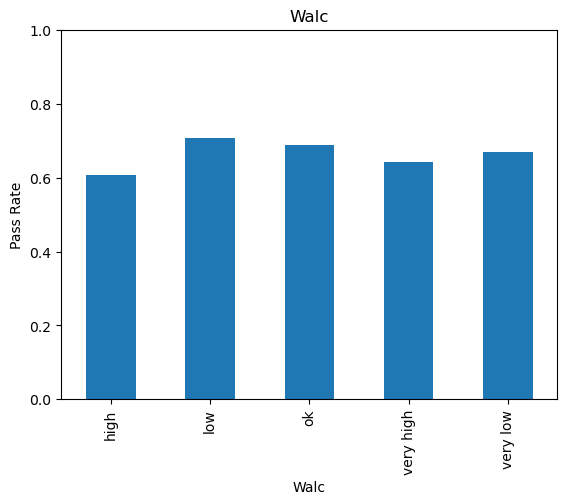

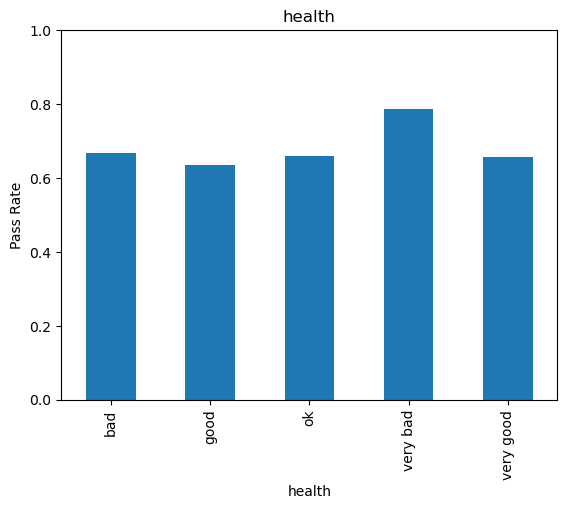

In [23]:
for feature in categorical_features:
    data = cdataset.copy()
    data.groupby(feature)["passed"].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Pass Rate")
    plt.ylim(0, 1)
    plt.title(feature)
    plt.show()